<h3> Importando as bibliotecas Pandas e SciKit Learn </h3>

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score
import pickle
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

<h3>Lendo os dados do modelo - automóveis</h3>

In [2]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/FuelConsumption2022.csv')
dataFrame.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [3]:
dataFrame.corr().round(4)

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size (L),NaN,1.0000,0.9206,0.8341,0.7461,0.8172,-0.7029,0.8226,-0.7644,-0.4484
Cylinders,NaN,0.9206,1.0000,0.8454,0.7356,0.8209,-0.6930,0.8324,-0.7611,-0.5022
Fuel Consumption City (L/100 km),NaN,0.8341,0.8454,1.0000,0.9219,0.9902,-0.9094,0.9654,-0.9203,-0.5229
Fuel Consumption Hwy (L/100 km),NaN,0.7461,0.7356,0.9219,1.0000,0.9668,-0.8770,0.9338,-0.8946,-0.3990
Fuel Consumption Comb (L/100 km),NaN,0.8172,0.8209,0.9902,0.9668,1.0000,-0.9143,0.9717,-0.9277,-0.4887
Fuel Consumption Comb (mpg),NaN,-0.7029,-0.6930,-0.9094,-0.8770,-0.9143,1.0000,-0.9130,0.9494,0.4721
CO2 Emissions (g/km),NaN,0.8226,0.8324,0.9654,0.9338,0.9717,-0.9130,1.0000,-0.9546,-0.5186
CO2 Rating,NaN,-0.7644,-0.7611,-0.9203,-0.8946,-0.9277,0.9494,-0.9546,1.0000,0.5003
Smog Rating,NaN,-0.4484,-0.5022,-0.5229,-0.3990,-0.4887,0.4721,-0.5186,0.5003,1.0000


<h3>Excluindo as features que não serão utilizadas</h3>

In [4]:
dataFrame.drop(columns=['Model Year', 'Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 
                        'Fuel Consumption City (L/100 km)', 
                        'Fuel Consumption Hwy (L/100 km)', 
                        'Fuel Consumption Comb (mpg)',
                        'CO2 Rating', 'Smog Rating'], inplace=True)

dataFrame.columns=['EngineSize', 'Cylinders', 'FuelConsumption', 'CO2Emissions']
dataFrame.head()

,EngineSize,Cylinders,FuelConsumption,CO2Emissions
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230


Text(0.5, 1.02, 'Correlação entre as Variáveis de Motorização')

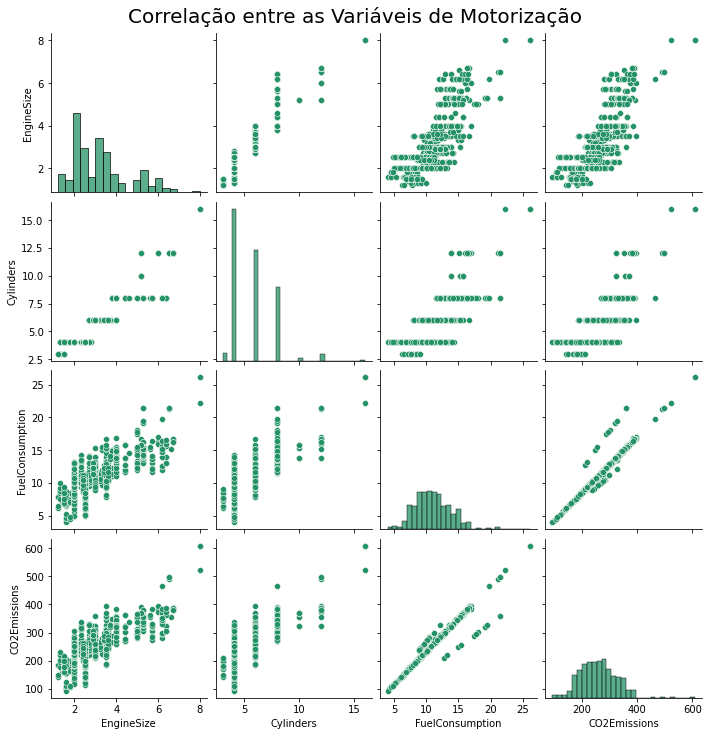

In [5]:
sns.set_palette('summer')
ax = sns.pairplot(data=dataFrame)
ax.fig.suptitle('Correlação entre as Variáveis de Motorização', y=1.02, fontsize=20)

<h3>Verificando a correlação de Pearson das variáveis numéricas</h3>

In [6]:
dataFrame.corr().round(4)

,EngineSize,Cylinders,FuelConsumption,CO2Emissions
EngineSize,1.0000,0.9206,0.8172,0.8226
Cylinders,0.9206,1.0000,0.8209,0.8324
FuelConsumption,0.8172,0.8209,1.0000,0.9717
CO2Emissions,0.8226,0.8324,0.9717,1.0000


<h3>Plotando um heatmap da correlação de pearson das variáveis numéricas</h3>


Text(0.5, 1.05, 'Mapa de Correlação de Pearson das Variáveis de Motorização')

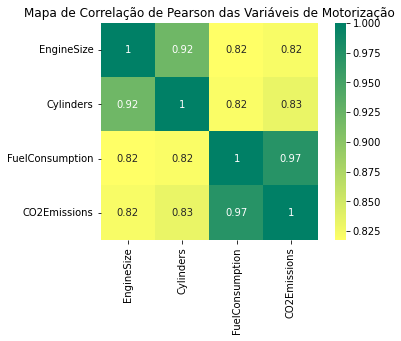

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(dataFrame.corr(), cmap="summer_r", annot=True, square=True, )
ax.set_title('Mapa de Correlação de Pearson das Variáveis de Motorização', fontsize=12, y=1.05)



<h3>Criando um regressor linear com múltiplas variáveis</h3>

In [8]:
var_independentes = dataFrame[['EngineSize', 'Cylinders', 'FuelConsumption']]

X_train, X_test, y_train, y_test = train_test_split(var_independentes, 
                                                   dataFrame.CO2Emissions, test_size=0.3, random_state=1234)
lr = LinearRegression().fit(X=X_train, y=y_train)
print(f'Coeficientes Angulares: {lr.coef_}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

Coeficientes Angulares: [ 0.5760032   2.81931782 19.95773286]
Coeficiente Linear: 19.759


In [9]:
def metricas(real : list, predict : list):
    r2 = r2_score(real, predict).round(2)
    mse = mean_squared_error(real, predict).round(2)
    rmse = np.sqrt(mse).round(2)
    erro_pct = np.round(rmse / np.mean(predict) * 100, 2)   
    return r2, mse, rmse, erro_pct

<h3>Avaliando o Regressor Linear</h3>

In [10]:
rl_train_r2, rl_train_mse, rl_train_rmse, rl_train_erro_pct_pred = metricas(y_train, lr.predict(X_train))

print(f'Coeficiente de Determinação :{rl_train_r2}.')
print(f'Erro médio quadrático : {rl_train_mse}.')
print(f'Raiz do Erro médio quadrático : {rl_train_rmse}.')
print(f'Erro percentual do preditor: {rl_train_erro_pct_pred}%')

Coeficiente de Determinação :0.95.
Erro médio quadrático : 203.03.
Raiz do Erro médio quadrático : 14.25.
Erro percentual do preditor: 5.54%


In [11]:
rl_r2, rl_mse, rl_rmse, rl_erro_pct_pred = metricas(y_test, lr.predict(X_test))

print(f'Coeficiente de Determinação :{rl_r2}.')
print(f'Erro médio quadrático : {rl_mse}.')
print(f'Raiz do Erro médio quadrático : {rl_rmse}.')
print(f'Erro percentual do preditor: {rl_erro_pct_pred}%')

dataAval = pd.DataFrame({'Linear Regression' : [rl_r2, rl_mse, rl_rmse, rl_erro_pct_pred]}).T
dataAval.columns = ['R2', 'MSE', 'RMSE', 'Erro %']
dataAval

Coeficiente de Determinação :0.95.
Erro médio quadrático : 248.88.
Raiz do Erro médio quadrático : 15.78.
Erro percentual do preditor: 5.99%


,R2,MSE,RMSE,Erro %
Linear Regression,0.95,248.88,15.78,5.99


<h3> Analisando os erros </h3>

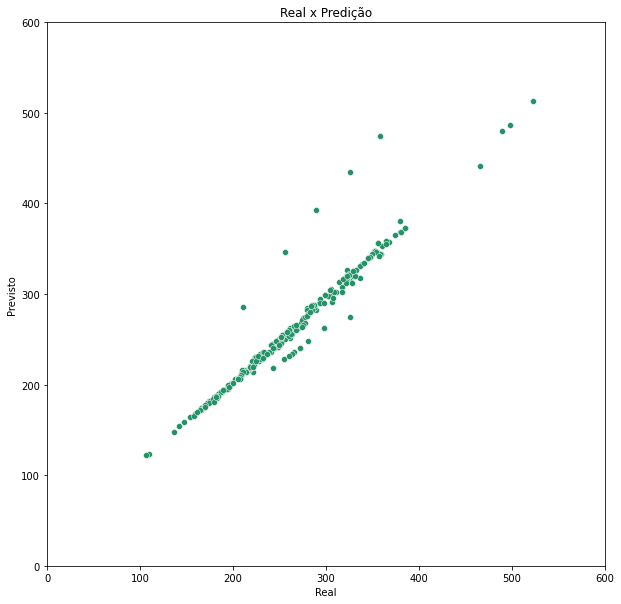

In [12]:
f, ax0 = plt.subplots(figsize=(10, 10))

ax0.set_title('Real x Predição', fontsize=12)
ax0.set_xlabel('Real', fontsize=10)
ax0.set_ylabel('Previsto', fontsize=10)
ax0.set_ylim(ymin=0, ymax=600)
ax0.set_xlim(xmin=0, xmax=600)

ax0 = sns.scatterplot(x=y_test, y=lr.predict(X_test), ax=ax0)

In [13]:
dataError = pd.DataFrame()
dataError['EngineSize'] = X_test['EngineSize']
dataError['Cylinders'] = X_test['Cylinders']
dataError['FuelConsumption'] = X_test['FuelConsumption']
dataError['CO2_Real'] = y_test
dataError['CO2_Predict'] = lr.predict(X_test)
dataError['Error'] = dataError['CO2_Real'] - dataError['CO2_Predict']
dataError.index = range(dataError.shape[0])

dataError.head()

,EngineSize,Cylinders,FuelConsumption,CO2_Real,CO2_Predict,Error
0,5.3,8,14.0,329,324.775067,4.224933
1,1.6,4,8.2,195,195.611733,-0.611733
2,2.0,4,9.1,212,213.804094,-1.804094
3,1.4,4,9.1,214,213.458492,0.541508
4,4.4,8,12.7,302,298.311611,3.688389


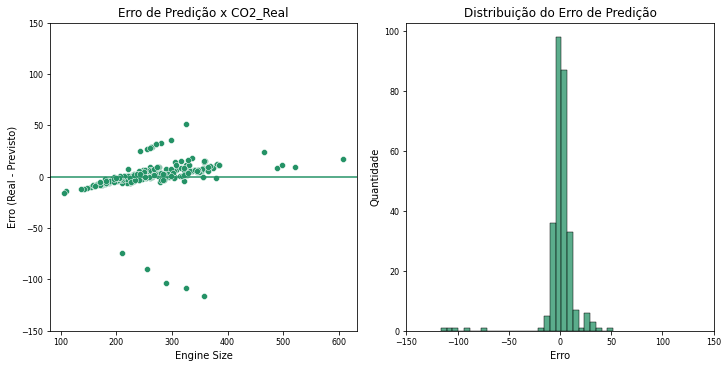

In [14]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(10,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.set_title('Erro de Predição x CO2_Real', fontsize=12)
ax0.set_xlabel('Engine Size', fontsize=10)
ax0.set_ylabel('Erro (Real - Previsto)', fontsize=10)
ax0.set_ylim(ymin=-150, ymax=150)
ax0.tick_params(labelsize=8)

ax0 = sns.scatterplot(x=dataError.CO2_Real, y= dataError.Error, ax=ax0)
ax0.axhline(0)


ax1.set_title('Distribuição do Erro de Predição', fontsize=12)
ax1.set_xlabel('Erro', fontsize=10)
ax1.set_ylabel('Quantidade', fontsize=10)
ax1.set_xlim(xmin=-150, xmax=150)
ax1.tick_params(labelsize=8)

sns.histplot(data=dataError, x="Error", bins=30, ax=ax1)

plt.show()

<h3>Predizendo a emissão de CO2 de um novo automóvel</h3>
<li>EngineSize:  4.2</li>
<li>Cylinders:  8</li>
<li>FuelConsumption:  13.25</li>

In [15]:
engine_size = 4.2
cylinders = 8
fuel_consumption = 13.25
dados_carro_novo = [[engine_size, cylinders, fuel_consumption]]
print(f'Emissão de CO2 do carro projetado: {lr.predict(dados_carro_novo)[0].round(2)} (g/km)')




Emissão de CO2 do carro projetado: 309.17 (g/km)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
dados_carro_novo = {'EngineSize' : 4.2,  'Cylinders' : 8, 'FuelConsumption': 13.25}
dfDadosCarroNovo = pd.DataFrame.from_dict(data = dados_carro_novo, orient='index').T
co2_predict = lr.predict(dfDadosCarroNovo[['EngineSize', 'Cylinders', 'FuelConsumption']])[0].round(2)
print(f'Emissão de CO2 do carro projetado: {co2_predict} (g/km)')




Emissão de CO2 do carro projetado: 309.17 (g/km)


<h3> Interpretando os coeficientes estimados </h3>

In [17]:
indices = ['Intercepto', 'Engine Size (L)', 'Cylinders (un)', 'Fuel Consumption Comb (L/100 km)']
parametros = pd.DataFrame(data=np.append(lr.intercept_, lr.coef_), index=indices, columns=['Parâmetros'])
parametros

,Parâmetros
Intercepto,19.759447
Engine Size (L),0.576003
Cylinders (un),2.819318
Fuel Consumption Comb (L/100 km),19.957733


<h3> Salvando e Recuperando o Preditor</h3>

In [18]:
out_model = open('/home/preditor_co2.bin', 'wb')
pickle.dump(lr, out_model)
out_model.close()

In [19]:
in_model = open('/home/preditor_co2.bin','rb')
co2_pred = pickle.load(in_model)
value_predict = co2_pred.predict(dfDadosCarroNovo[['EngineSize', 'Cylinders', 'FuelConsumption']])[0].round(2)
print(f'Emissão de CO2 do carro projetado: {co2_predict} (g/km)')

Emissão de CO2 do carro projetado: 309.17 (g/km)


<h3>Predição por Regressão Multipla usando Gradiente Descedente Estocástico</h3>

In [20]:
dataAval_sgdr_train = pd.DataFrame(columns = ['R2', 'MSE', 'RMSE', 'Erro %'])

etas = [0.0005, 0.001, 0.005, 0.01]

for eta in etas :
    sgdr = SGDRegressor(learning_rate= 'constant', eta0=eta).fit(X=X_train, y=y_train)
    r2, mse, rmse, erro_pct_pred = metricas(y_train, sgdr.predict(X_train))
    column_name = 'Stochastic Gradient Descent Regressor ('+ str(eta) + ')'
    dataAval_sgdr = pd.DataFrame({column_name : [r2, mse, rmse, erro_pct_pred]}).T
    dataAval_sgdr.columns = ['R2', 'MSE', 'RMSE', 'Erro %']
    dataAval_sgdr_train = dataAval_sgdr_train.append(dataAval_sgdr)
    

dataAval_sgdr_train

,R2,MSE,RMSE,Erro %
Stochastic Gradient Descent Regressor (0.0005),0.95,213.16,14.60,5.72
Stochastic Gradient Descent Regressor (0.001),0.94,234.59,15.32,5.86
Stochastic Gradient Descent Regressor (0.005),0.94,219.37,14.81,5.72
Stochastic Gradient Descent Regressor (0.01),0.85,601.39,24.52,10.17


In [21]:
sgdr = SGDRegressor(learning_rate= 'constant', eta0=0.001).fit(X=X_train, y=y_train)

print(f"Intercepto: {sgdr.intercept_}")
print(f"Intercepto: {sgdr.coef_}")

Intercepto: [8.50848635]
Intercepto: [-1.37980498  3.77279937 21.23396682]


In [22]:
etas = [0.0005, 0.001, 0.005, 0.01]

ss = StandardScaler().fit(X=X_train)
X_std = ss.transform(X=X_train)

for eta in etas :
    sgdr_std = SGDRegressor(learning_rate= 'constant', eta0=eta).fit(X=X_std, y=y_train)
    r2, mse, rmse, erro_pct_pred = metricas(y_train, sgdr_std.predict(X_std))
    column_name = 'StdScaler - Stochastic Gradient Descent Regressor ('+ str(eta) + ')'
    dataAval_sgdr = pd.DataFrame({column_name : [r2, mse, rmse, erro_pct_pred]}).T
    dataAval_sgdr.columns = ['R2', 'MSE', 'RMSE', 'Erro %']
    dataAval_sgdr_train = dataAval_sgdr_train.append(dataAval_sgdr)
    
dataAval_sgdr_train


,R2,MSE,RMSE,Erro %
Stochastic Gradient Descent Regressor (0.0005),0.95,213.16,14.60,5.72
Stochastic Gradient Descent Regressor (0.001),0.94,234.59,15.32,5.86
Stochastic Gradient Descent Regressor (0.005),0.94,219.37,14.81,5.72
Stochastic Gradient Descent Regressor (0.01),0.85,601.39,24.52,10.17
StdScaler - Stochastic Gradient Descent Regressor (0.0005),0.95,203.11,14.25,5.54
StdScaler - Stochastic Gradient Descent Regressor (0.001),0.95,203.26,14.26,5.54
StdScaler - Stochastic Gradient Descent Regressor (0.005),0.95,203.07,14.25,5.54
StdScaler - Stochastic Gradient Descent Regressor (0.01),0.95,203.84,14.28,5.56


In [23]:
eta = 0.0005
sgdr_std = SGDRegressor(learning_rate= 'constant', eta0=eta).fit(X=X_std, y=y_train)

X_test_std = ss.transform(X_test)

sgdr_std_r2, sgdr_std_mse, sgdr_std_rmse, sgdr_std_erro_pct_pred = metricas(y_test, sgdr_std.predict(X_test_std))

dataAval_ss = pd.DataFrame({'SGDR (Dados Standardizados)' : [sgdr_std_r2, sgdr_std_mse, sgdr_std_rmse, sgdr_std_erro_pct_pred]}).T
dataAval_ss.columns = ['R2', 'MSE', 'RMSE', 'Erro %']
dataAval = dataAval.append(dataAval_ss)
dataAval

,R2,MSE,RMSE,Erro %
Linear Regression,0.95,248.88,15.78,5.99
SGDR (Dados Standardizados),0.95,248.02,15.75,5.98


In [24]:
print(f"Intercepto: {sgdr_std.intercept_}")
print(f"Intercepto: {sgdr_std.coef_}")

Intercepto: [257.30388821]
Intercepto: [ 1.57846719  5.25727436 55.18300027]


In [25]:
std_dados_carro_novo = ss.transform(dfDadosCarroNovo)
co2_predict = sgdr_std.predict(std_dados_carro_novo)[0].round(2)
print(f'Emissão de CO2 do carro projetado: {co2_predict} (g/km)')

Emissão de CO2 do carro projetado: 309.3 (g/km)
